Семинар 4 (неделя 5): Свойства статистических оценок
=====

In [1]:
# Импорт библиотек для работы со статистикой
import numpy as np
import scipy.stats as sts

# Импорт библиотек для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Стиль для графиков
plt.style.use('ggplot')
%matplotlib inline

## 0. Центральная предельная теорема

Вспомним, как работает ЦПТ. Сгенерируем набор значений случайной величины $X \sim U(-1, 1)$:

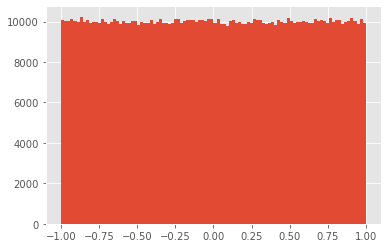

In [4]:
uniform_rv = sts.uniform(-1, 2)    # заданы левая граница "-1" и длина "2"

n_obs = 10**6

X_u = uniform_rv.rvs(n_obs)

plt.hist(X_u, bins=100);

$$
\sigma = \sqrt{\frac{(b - a)^2}{12}}
$$

In [5]:
( (1+1)**2 / 12 )**0.5

0.5773502691896257

In [6]:
np.std(X_u)

0.5777183035084751

$$
X_1 + \ldots + X_n = Sn \sim N(\mu n, \sigma \sqrt{n})
$$

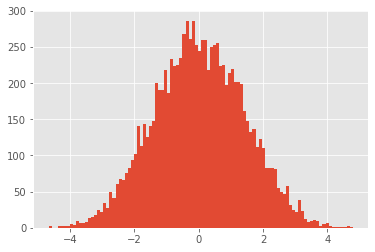

In [11]:
Sum_N = []

N = 6

for i in range(10000):
    s_x = np.random.choice(X_u, size = N)
    Sum_N.append( np.sum(s_x) )
    
plt.hist(Sum_N, bins=100);

$$
\frac{Sn}{n} \sim N(\mu, \frac{\sigma}{\sqrt{n}})
$$

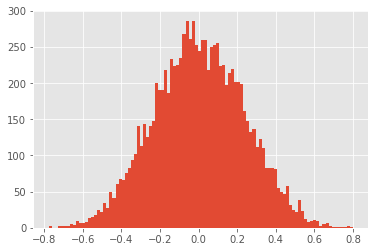

In [12]:
plt.hist(np.array(Sum_N)/N, bins=100);

In [14]:
np.std(np.array(Sum_N)/N), np.std(X_u) / ( N**0.5 )

(0.23353052711042022, 0.23585250977701813)

Выборочное среднее:

$$
\frac{S_n}{n} = \frac{1}{n}\sum_{i=1}^n X_i = \bar X
$$

$$
\bar X \sim N(\mu, \frac{\sigma}{\sqrt{n}} )
$$



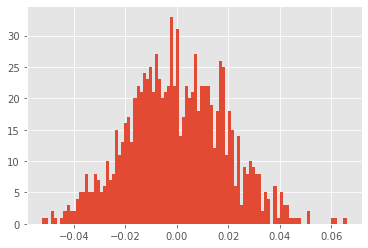

In [20]:
X_mean = []
for i in range(1000):
    s_x = np.random.choice(X_u, size = 1000)
    X_mean.append( np.mean(s_x) )
    
plt.hist(X_mean, bins=100);

## 1. Метод моментов

### Пример 1.1

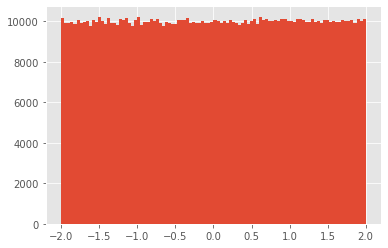

In [30]:
uniform_rv = sts.uniform(-2, 4)    # заданы левая граница "-2" и длина "4"

n_obs = 10**6

X_u = uniform_rv.rvs(n_obs)

plt.hist(X_u, bins=100);

$$
E(X_u^2) = \int_{-\theta}^{\theta} X_u^2 f(x)dx = \frac{\theta^3}{3} \Rightarrow \hat \theta^{MM} = \sqrt{3 \overline{X_u^2}}
$$

In [31]:
X_sample = np.random.choice(X_u, size = 10000)
XX = X_sample**2

X_sample[:5], XX[:5]

(array([-1.2121308 ,  1.11011401, -1.0623201 ,  0.7931132 , -0.25885372]),
 array([1.46926108, 1.23235313, 1.12852399, 0.62902854, 0.06700525]))

In [32]:
Theta = (np.mean(XX)*3)**0.5
Theta

2.0107715078885136

In [53]:
X_sample = np.random.choice(X_u, size = 20)
(np.mean(X_sample**2)*3)**0.5

2.079161505241929

### Пример 1.2

Пусть случайная величина $\xi$ имеет плотность $p(x) = \frac{1}{b - a}$ при $a \leq x \leq b $, иначе $p(x) = 0$.
Произведена выборка:

In [55]:
tabledata = np.array([[1, 3],[2, 5], [3, 4], [4, 3], [5, 6], [8, 4], [9, 5]])
tabledata

array([[1, 3],
       [2, 5],
       [3, 4],
       [4, 3],
       [5, 6],
       [8, 4],
       [9, 5]])

Используя метод моментов, найти $a$ и $b$.

Приравняем математическое ожидание и дисперсию

$$
E(x) = \frac{b + a}{2},    Var(x) = \frac{(b - a)^2}{12}
$$

соответствующим моментам и получим систему:

$$
\begin{equation*}
 \begin{cases}
   E(x) = \frac{b + a}{2} = \mu_1 =  \frac{1}{n} \sum_{i=1}^n x_i n_i\\
   Var(x) = \frac{(b - a)^2}{12} = \mu_2 =  \frac{1}{n}\sum_{i=1}^n x_i^2 n_i - \left( \frac{1}{n}\sum_{i=1}^n x_i n_i \right)^2
 \end{cases}
\end{equation*}
$$

In [57]:
table_x = tabledata[:, :1]
table_n = tabledata[:, 1:]
table_xn = table_x * table_n
table_xn

array([[ 3],
       [10],
       [12],
       [12],
       [30],
       [32],
       [45]])

In [58]:
mu1 = sum(table_xn) / 30
mu1[0]

4.8

In [59]:
mu2 = sum(table_x**2 * table_n) / 30 - mu1**2
mu2[0]

7.560000000000002

Подставляем в систему и решаем уравнения:

$$
\begin{equation*}
 \begin{cases}
   \frac{b + a}{2} = \mu_1 \\
   \frac{(b - a)^2}{12} = \mu_2
 \end{cases}
\end{equation*}
$$

$$
 b = 2\mu_1 - a \\
 (2\mu_1 - a - a)^2 = 12\mu_2 \\
 (\mu_1 - a)^2 = 3\mu_2 \\
 \mu_1^2 - 2a\mu_1 + a^2 = 3\mu_2 \\
 a^2 - 2a\mu_1 + mu_1^2 - 3\mu_2 = 0 \\
 a_{1,2} = \frac{ 2\mu_1 \pm \sqrt{4\mu_1^2 - 4(\mu_1^2 - 3\mu_2)}}{2}\\
 a_{1,2} = \mu_1 \pm \sqrt{3\mu_2}\\
 a = \mu_1 - \sqrt{3\mu_2}, b = \mu_1 + \sqrt{3\mu_2}\\
 a = 0.038, b = 9.562
$$

### Пример 1.3

Число семян сорняков в пробах зерна подчинено закону Пуассона. Имеется выборка $N =130$ проб зерна. Результаты записаны в таблице. Найти параметр $\lambda$ по выборке методом моментов. 

In [61]:
tabledata = np.array([[0, 9],[1, 39], [2, 40], [3, 24], [4, 11], [5, 7]])
tabledata

array([[ 0,  9],
       [ 1, 39],
       [ 2, 40],
       [ 3, 24],
       [ 4, 11],
       [ 5,  7]])

Как известно, параметр $\lambda$ для закона Пуассона – это математическое ожидание, которое по методу моментов оценивается первым выборочным моментом:

$$
\lambda = \bar X = \frac{1}{N} \sum_i^n x_i n_i
$$

In [63]:
lmbd = sum(tabledata[:, :1] * tabledata[:, 1:]) / 130
lmbd[0]

2.076923076923077

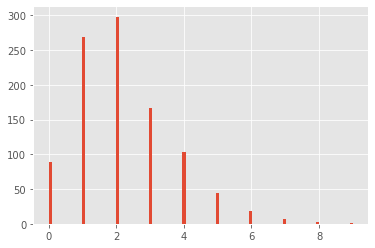

In [56]:
r = sts.poisson.rvs(mu = lmbd, size=1000)
plt.hist(r, bins=100);

## 2. Асимптотический доверительный интервал для среднего

$$
\mathbb{P} = \left( \bar X - Z_{1-\frac{\alpha}{2}} \frac{\hat \sigma}{\sqrt{n}} 
\leq \mu \leq \bar X + Z_{1-\frac{\alpha}{2}} \frac{\hat \sigma}{\sqrt{n}} \right) = 1 - \alpha
$$

$$
\mu = \bar X \pm Z_{1-\frac{\alpha}{2}} \frac{\hat \sigma}{\sqrt{n}}
$$

$$
\Delta = 2 Z_{1-\frac{\alpha}{2}} \frac{\hat \sigma}{\sqrt{n}}
$$

In [68]:
norm_rv = sts.norm(loc=0, scale=1)  # задали генератор 
norm_rv.ppf(0.975) # нашли квантиль

1.959963984540054

In [69]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    """
        Строит 95% асимптотически-нормальный доверительный интервал
    """
    
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sts.norm(mean_hat, std_hat).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sts.norm.interval(1 - alpha, loc=mean_hat, scale=std_hat)
    
    for i in [left, right]: 
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)
        
        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        
        text_margin = 0.05
        plt.text(i + text_margin, 0.8*y_max, round(i, 2), color="blue", fontsize=14)
        yq = sts.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    return left, right


(-1.959963984540054, 1.959963984540054)

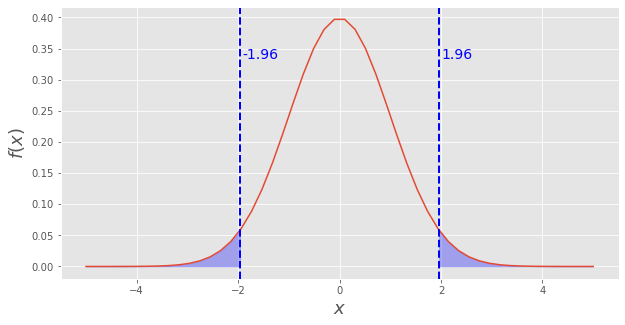

In [74]:
alpha = 0.05
norm_conf_int(alpha, mean_hat = 0, std_hat = 1, margin = 5)

### Пример 2.1

По данным 7 измерений некоторой величины найдены среднее результатов измерений, равное 30 и выборочная дисперсия, равная 36. Найдите границы, в которых с надежностью 0,99 заключено истинное значение измеряемой величины.

In [75]:
n_x = 7
mean_x = 30
var_x = 36

mu_hat = mean_x                  # нашли оценку параметра 
sigma = ( var_x / n_x )**0.5   # оценили стандартное отклонение

mu_hat, sigma

(30, 2.2677868380553634)

In [77]:
alpha = 0.01
z_alpha = norm_rv.ppf(1 - alpha/2) # из нормального распределения автоматически посчитался квантиль
z_alpha

2.5758293035489004

In [79]:
# по формулам посчитали границы
mu_left = mu_hat - z_alpha * sigma
mu_right = mu_hat + z_alpha * sigma

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{mu_left:.3}, {mu_right:.3}] ширины { mu_right - mu_left:.3}")

Доверительный интервал [24.2, 35.8] ширины 11.7


По аналогии можно построить асимптотический доверительный интервал с помощью уже готовой функции. Единственное, что от нас потребуется: вычислить среднее и дисперсию:

In [81]:
mu_hat = mean_x                  # нашли оценку параметра 
sigma = ( var_x / n_x )**0.5   # оценили стандартное отклонение

sts.norm.interval(0.99, loc = mu_hat, scale = sigma)

(24.15856820833449, 35.841431791665514)

Можно построить этот же доверительный интервал на картинке:

(24.15856820833449, 35.841431791665514)

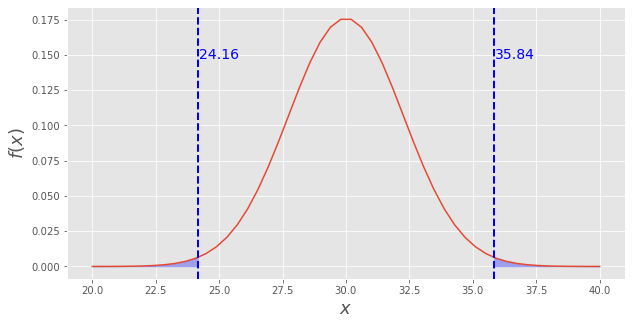

In [82]:
alpha = 0.01
norm_conf_int(alpha, mean_hat = mu_hat, std_hat = sigma, margin = 10)

## Пример 2.2

Таня и Ульяна смотрят сериалы. Число серий - счётчик, можно предположить, что $X \sim Poiss(\lambda)$, где $\lambda$ - интенсивность просмотра. Каждая девушка смотрит сериалы со своей интенсивностью $\lambda_i$. 

Ульяна считает, что она опережает Таню по интенсивности просмотра. Нужно построить доверительный интервал для разности $\lambda_U - \lambda_T$ и понять, правда ли, что Ульяна впереди. Для простоты будем считать, что Ульяна и Таня смотрят сериалы независимо друг от друга.

In [84]:
U = [5, 7, 8, 2, 3, 1, 2]  # Ульяна
T = [1, 1, 9, 1, 2, 2, 2]  # Таня

$$
\bar x - \bar y \sim N \left(  \mu_x - \mu_y, \frac{\hat \sigma_x^2}{n} + \frac{\hat \sigma_y^2}{m} \right)
$$

$$
\mu_x - \mu_y = (\bar x - \bar y) \pm Z_{1-\frac{\alpha}{2}} \sqrt{ \frac{\hat \sigma_x^2}{n} + \frac{\hat \sigma_y^2}{m} }
$$

$$
\lambda_U - \lambda_T = (\hat \lambda_U - \hat \lambda_T) \pm Z_{1-\frac{\alpha}{2}} \sqrt{ \frac{\hat \lambda_U}{n} + \frac{\hat \lambda_T}{m} }
$$

In [85]:
alpha = 0.05 # задаём уровень значимости 

z_alpha = norm_rv.ppf(1 - alpha/2) # квантиль для нормального распределения

diff = np.mean(U) - np.mean(T)
diff_se = np.sqrt(np.mean(U)/len(U) + np.mean(T)/len(T))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-0.47, 3.33] ширины 3.8


Доверительный интервал покрывает ноль. Это означает, что Ульяна и Таня смотрят сериал с одинаковой интенсивностью.

Угадайте как часто мы сделаем ошибку, утверждая это? Правильно! В $5\%$ случаев.

Фактически мы с вами только что проверили на уровне значимости $5\%$ гипотезу о равенстве средних. Зафиксируйте это в голове и вспомните, когда мы чётко и по шагам формализуем процедуру проверки гипотез.

(-0.47044607117023984, 3.3275889283130966)

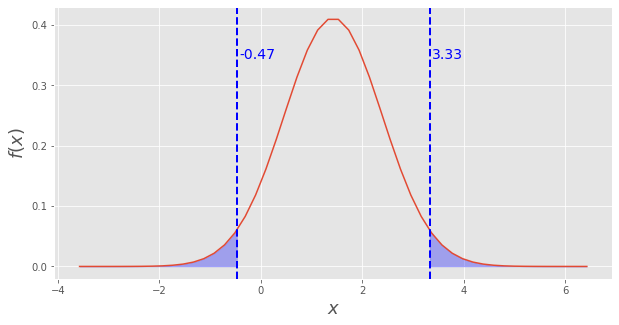

In [86]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)

In [87]:
diff = np.mean(T) - np.mean(U)
diff_se = np.sqrt(np.mean(T)/len(T) + np.mean(U)/len(U))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [-3.33, 0.47] ширины 3.8


(-3.3275889283130966, 0.47044607117023984)

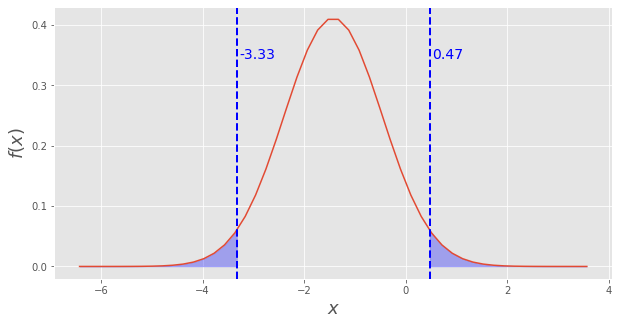

In [88]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)

In [94]:
U = [5, 7, 9, 2, 3, 3, 3]  # Ульяна
T = [1, 1, 9, 1, 2, 2, 2]  # Таня

diff = np.mean(U) - np.mean(T)
diff_se = np.sqrt(np.mean(U)/len(U) + np.mean(T)/len(T))

left = diff - z_alpha*diff_se
right = diff + z_alpha*diff_se

# Помимо самого интервала нас интересует его ширина
print(f"Доверительный интервал [{left:.3}, {right:.3}] ширины {right - left:.3}")

Доверительный интервал [0.0201, 3.98] ширины 3.96


(0.020137393786173963, 3.979862606213825)

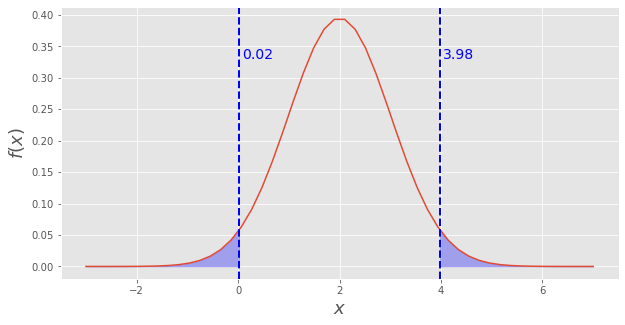

In [95]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)

## 3. Асимптотический доверительный интервал для долей

$$
\hat p \pm Z_{1-\frac{\alpha}{2}} \sqrt{ \frac{ \hat p (1 - \hat p) }{n}}
$$

### Пример 3.1 

Из партии объемом 500 однородных товаров для проверки по схеме случайной бесповторной выборки отобрано 70 товаров, среди которых оказалось 56 небракованных. Найдите границы, в которых с надежностью 0,96 заключена доля бракованных товаров во всей партии, а также  вероятность того, что доля бракованных товаров во всей партии отличается от полученной доли в выборке не более чем на 0,02 (по абсолютной величине).

In [96]:
# Выборочная доля бракованных товаров
p_hat = (70 - 56) / 70  
p_hat


0.2

In [97]:
sigma = ( p_hat * (1 - p_hat) / 70 )**0.5
sigma

0.04780914437337575

In [98]:
alpha = 0.04

z_alpha = norm_rv.ppf(1 - alpha/2) # из нормального распределения автоматически посчитался квантиль
z_alpha

2.0537489106318225

(0.10181202182494004, 0.29818797817506)

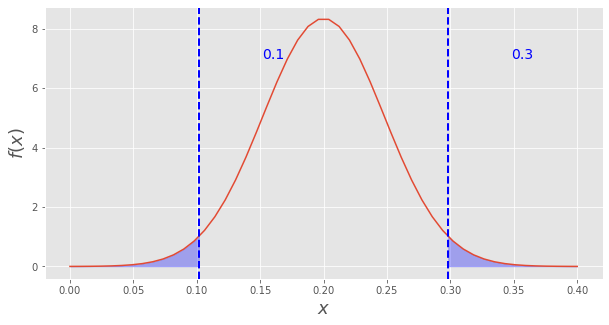

In [99]:
norm_conf_int(alpha, mean_hat = p_hat, std_hat = sigma, margin = 0.2)

$$
Z_{1-\frac{\alpha}{2}} \sigma \leq 0.02
$$

$$
Z_{1-\frac{\alpha}{2}} \leq \frac{0.02}{\sigma} \approx 0.42
$$

https://www.webmath.ru/poleznoe/table_laplasa.php

In [102]:
z_alpha = 0.42

Prob = norm_rv.cdf(z_alpha) - norm_rv.cdf(-z_alpha)
Prob

0.32551454630350096

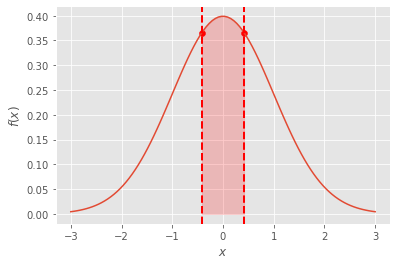

In [104]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([-z_alpha, z_alpha], [norm_rv.pdf(-z_alpha), norm_rv.pdf(z_alpha)], color="red");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-z_alpha, z_alpha)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='red', alpha=0.2)

plt.axvline(-z_alpha, color='red', linestyle="--", lw=2)
plt.axvline(z_alpha, color='red', linestyle="--", lw=2);

(0.1799201593631822, 0.22007984063681782)

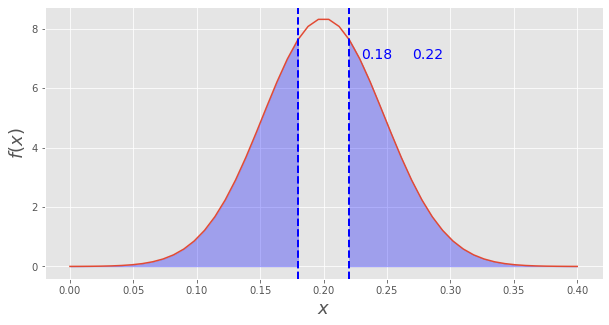

In [35]:
alpha = 1 - Prob
norm_conf_int(alpha, mean_hat = p_hat, std_hat = sigma, margin = 0.2)

## 4. Свойства статистических оценок

### Пример 4.1 Несмещённость

Оценка $\hat{\theta}$ параметра $\theta$ называется несмещённой, если $\mathbb{E} (\hat{\theta}) = \theta$

Несмещённые мамонтоборцы
В долине летучей мыши Шикака живёт племя Вачати. Оно охотится на мамонтов. Древний Бог Оньянкопонга не так давно сгенерировал в долине реки из нормального распределения $10$ тысяч мамонтов со средним весом $300$ кг и стандартным отклонением $100$ кг.

In [93]:
norm_rv = sts.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**4)

np.mean(x_mamont) # настоящее среднее

299.6435081972259

Шаман Одэхингум (лёгкое колебание воды) уверен в своём взоре:
$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$
Шаман Пэпина (виноградная лоза, растущая вокруг дуба) не любит, когда его избивают за слишком оптимистичные прогнозы:
$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$
Шаман Апониви (где ветер вырывает промежуток с корнем) тоже коректирует прогноз:
$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

In [94]:
# Команда нам не подходит, так как она всю матрицу сделает без повторений
# np.random.choice(x_mamont, size=(n,m), replace=False)

n = 100

th_od = np.zeros(200)
th_pe = np.zeros(200)
th_ap = np.zeros(200)

for i in range(200):
    x_sample = np.random.choice(x_mamont, size=n, replace=False)
    x_mean = np.mean(x_sample)
    th_od[i] = x_mean
    th_pe[i] = x_mean - 4200/n
    th_ap[i] = x_mean - 5*(n+1)/n

In [95]:
# посмотрим на оценки E(\hat \theta)
np.mean(th_od), np.mean(th_pe), np.mean(th_ap)

(299.3737164364601, 257.3737164364601, 294.3237164364601)

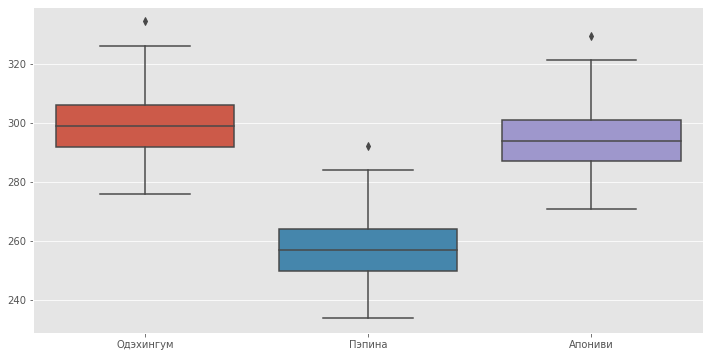

In [96]:
import pandas as pd

plt.figure(figsize=(12,6))

df = pd.DataFrame(zip(th_od, th_pe, th_ap), columns = ['Одэхингум', 'Пэпина', 'Апониви'])
sns.boxplot(data = df,);

## Пример 4.2 Состоятельность

Определение: Оценка $\hat \theta$ параметра $\theta$ называется состоятельной, если $\hat \theta \to \theta$ по вероятности при росте $n$.

In [97]:
norm_rv = sts.norm(loc=300, scale=100)

# вся генеральная совокупность 
x_mamont = norm_rv.rvs(size = 10**6)

theta_real = np.mean(x_mamont) # настоящее среднее
theta_real

300.03548366039195

Шаманы и их оценки:

$$\begin{equation*}
 \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i \\
 \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n} \\
 \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n} \\
\end{equation*}$$

In [98]:
theta_hat = np.zeros((100, 50))

for n in range(100, 10100, 100): # поднимаемся выше и видим больше мамонтов
    
    # 50 выборок с повторениями для простоты 
    x_sample = np.random.choice(x_mamont, size = (n, 50), replace=False)
    
    # 50 разных оценок 
    x_mean = np.mean(x_sample, axis=0) 
    
    theta_hat[n//100 - 1] = x_mean                # состоятельная
    #theta_hat[n//100 - 1] = (x_mean - 4200/n)     # состоятельная
    #theta_hat[n//100 - 1] = (x_mean - 5*(n+1)/n)   # несостоятельная

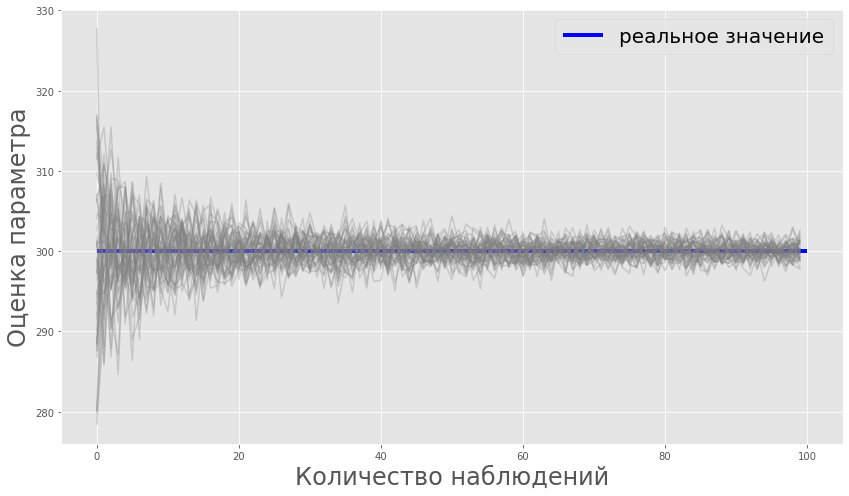

In [99]:
plt.figure(figsize=(14,8))
plt.plot(theta_hat, c='grey', alpha = 0.3)

plt.xlabel('Количество наблюдений', size=24)
plt.ylabel('Оценка параметра', size=24)

plt.hlines(theta_real, 0, 100, color='blue', lw=4, label='реальное значение')
plt.legend(fontsize=20);

## Пример 4.3 Эффективность

Определение: Оценка $\hat \theta$ параметра $\theta$ называется эффективной в некотором классе оценок, если её дисперсия, $Var(\hat \theta)$ в этом классе оценок, при заданном объёме выборке минимальна.

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

У нас есть выборка $x_1, \ldots, x_n \sim iid \hspace{2mm} U[0; \theta]$. Мы оценили параметр $\theta$ двумя способами. Методом моментов и методом максимального правдоподобия:

$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$
Обе оценки оказались несмещёнными и состоятельными. Какую из них выбрать? Ответ прост: надо понять какая из них эффективнее.

Сгенерируйте выборку оценок каждого вида. Постройте по ним гистограммы и найдите этот простой ответ.

In [100]:
uniform_rv = sts.uniform(0, 5)

n_obs = 100

# 1000 выборок размера n_obs
x = uniform_rv.rvs(size = (n_obs, 1000))
x.shape

(100, 1000)

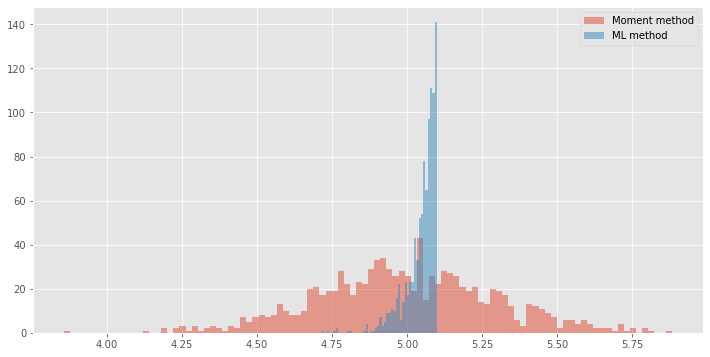

In [101]:
# первая оценка 
theta_1 = 2*np.mean(x, axis=0)

# вторая оценка 
theta_2 = (n_obs + 2)/n_obs*np.max(x, axis=0)

plt.figure(figsize=(12,6))
plt.hist(theta_1, bins=100, alpha=0.5, label='Moment method')
plt.hist(theta_2, bins=50, alpha=0.5, label='ML method')
plt.legend();

Видим, что у оценки максимального правдоподобия разброс оказался меньше.

In [102]:
np.var(theta_1), np.var(theta_2)

(0.08686163426338142, 0.0027255708033537937)

## Пример 4.4 Функция потерь

$$
MSE = \mathbb{E}(\hat \theta -\theta) = Var(\hat \theta) + bias^2 ( \hat \theta)
$$

Пусть имеется выборка из трёх наблюдений $Y_1, Y_2, Y_3 \sim iid (\mu, \sigma^2)$.

$\mathbb{E}(Y_i) = Var(Y_i) = \frac{\theta}{2}$

Ищем оценку неизвестного параметра $\theta$ в виде $\hat \theta = \gamma (Y_1 + Y_2 + Y_3)$

а) При каком значении $\gamma$ оценка окажется несмещённой?

б) При каком значении $\gamma$ оценка будет минимизировать MSE?

Найдём значения $\mathbb{E}(\hat \theta)$ и $Var(\hat \theta)$:

$\mathbb{E}(\hat \theta) = \mathbb{E}( \gamma (Y_1 + Y_2 + Y_3) ) = 3 \gamma \mathbb{E}(Y_i) = 3 \gamma \frac{\theta}{2} $

$Var(\hat \theta) = Var( \gamma (Y_1 + Y_2 + Y_3) ) = 3 \gamma^2 Var(Y_i) = 3 \gamma^2 \frac{\theta}{2} $

### Пункт (а)

Чтобы выполнялось условие несмещённости $\mathbb{E} (\hat{\theta}) = \theta$, необходимо $\gamma = \frac{2}{3}$:

$\mathbb{E}(\hat \theta) = 3 \gamma \frac{\theta}{2} = 3 \frac{2}{3} \frac{\theta}{2} = \theta$

### Пункт (б)

$MSE = \mathbb{E}(\hat \theta -\theta) = Var(\hat \theta) + bias^2 ( \hat \theta) = Var(\hat \theta) + (\mathbb{E}(\hat \theta) - \theta)^2$

$ MSE = 3 \gamma^2 \frac{\theta}{2} + (3 \gamma \frac{\theta}{2} - \theta)^2 $

Для минимизации $MSE$ найдём её производную по параметру $\gamma$ и приравняем к нулю:

$$
MSE_{\gamma}' = 3 \frac{\theta}{2} 2 \gamma + 2 \cdot 3 \frac{\theta}{2} (3 \gamma \frac{\theta}{2} - \theta) = 0
$$

$MSE_{\gamma}' = 3 \theta \gamma + 3 \theta 3 \gamma \frac{\theta}{2} - 3 \theta^2 = 0$

$ 3 \gamma( \theta + 3 \frac{\theta^2}{2}) = 3 \theta^2 $

$$
\gamma = \frac{ \theta^2}{ \theta + \frac{3 \theta^2}{2}} = \frac{2}{3+ \frac{2}{\theta}}
$$

Сравните с $\gamma = \frac{2}{3}$, полученным в пункте (а)